In [8]:
# Basic libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CNN libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing import image
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Metric Libraries
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_dir = 'dataset/train'
test_dir = 'dataset/test'

train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (224, 224),
                    batch_size = 32,
                    class_mode = 'categorical',
                    shuffle = True,
                    seed = 42,
                    subset='training')

val_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (224, 224),
                    batch_size = 32,
                    class_mode = 'categorical',
                    shuffle = True,
                    seed = 42,
                    subset='validation')

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size = (224, 224),
                    batch_size = 32,
                    class_mode = 'categorical',
                    shuffle = False)

Found 1975 images belonging to 4 classes.
Found 492 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [9]:
model = Sequential(
    [
        Conv2D(16,kernel_size=3,activation='relu',input_shape=(224,224,3)),
        MaxPooling2D((2,2)),

        Conv2D(32,kernel_size=3,activation='relu',padding='same'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Dropout(0.3),

        Conv2D(64,kernel_size=3,activation='relu',padding='same'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Dropout(0.3),

        Conv2D(128,kernel_size=3,activation='relu',padding='same'),
        MaxPooling2D((2,2)),
        BatchNormalization(),
        Dropout(0.3),

        Flatten(),

        Dense(128,activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(4,activation='softmax')
    ]
)

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 111, 111, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 55, 55, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 55, 55, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,868,388 (10.94 MB)

 Trainable params: 2,867,684 (10.94 MB)

 Non-trainable params: 704 (2.75 KB)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(filepath='best_model.keras',  #  Change .h5 → .keras
                                   monitor='val_accuracy',
                                   save_best_only=True,
                                   save_weights_only=False,  # Change to False to save full model
                                   mode='max',
                                   verbose=1)
history = model.fit(
    train_generator, 
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8201 - loss: 0.3638
Epoch 1: val_accuracy improved from -inf to 0.69309, saving model to best_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8202 - loss: 0.3639 - val_accuracy: 0.6931 - val_loss: 0.7169
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8280 - loss: 0.3501
Epoch 2: val_accuracy improved from 0.69309 to 0.72561, saving model to best_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8279 - loss: 0.3504 - val_accuracy: 0.7256 - val_loss: 0.8003
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8241 - loss: 0.3846
Epoch 3: val_accuracy improved from 0.72561 to 0.75203, saving model to best_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.8243 - loss: 0.3842 - val_accuracy: 0.7520 - val_loss: 0.6707
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8339 - loss: 0.3630
Epoch 4: val_accuracy improved from 0.75203 to 0.77846, s

In [15]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Loss: {test_loss:.2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.9636 - loss: 0.0883
Test Accuracy: 0.95
Test Loss: 0.12


In [17]:
y_pred = model.predict(test_generator)
y_pred_class = np.argmax(y_pred, axis=1)
true_class = test_generator.classes

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step


Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.99      0.96       109
           1       0.99      0.94      0.96       109
           2       0.92      0.96      0.94       109
           3       0.96      0.92      0.94       106

    accuracy                           0.95       433
   macro avg       0.95      0.95      0.95       433
weighted avg       0.95      0.95      0.95       433



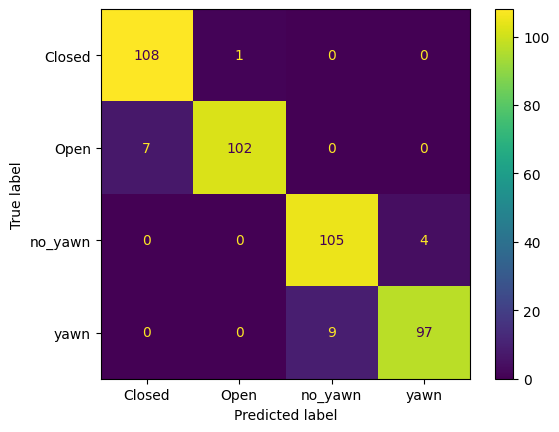

In [18]:
# metrics
cm = ConfusionMatrixDisplay.from_predictions(true_class, y_pred_class, display_labels=test_generator.class_indices)
print('Classification Report:\n\n', classification_report(true_class, y_pred_class))